<a href="https://colab.research.google.com/github/Ncast07/Python_2023/blob/main/12_EDA_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analyst (EDA)

## Primera Parte: Validación de Datos

In [43]:
#Cargamos nuestra data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive #Importante ejecutar para montar la carpeta Mydrive
drive.mount('/content/drive') #Importante ejecutar para montar la carpeta Mydrive

culqi_df = pd.read_excel("/content/drive/MyDrive/1 Bootcamp_Python_DSRP/6_SextaClase/Ejercicio 2_.xlsx")

culqi_df.info()
culqi_df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22446 entries, 0 to 22445
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA VENTA       22446 non-null  datetime64[ns]
 1   CANAL VENTA       22446 non-null  object        
 2   RUC CLIENTE       22446 non-null  object        
 3   VENDEDOR          22446 non-null  object        
 4   VENTA ACTIVA      22446 non-null  int64         
 5   FECHA ACTIVACION  14067 non-null  datetime64[ns]
 6   FLUJO MES VENTA   5426 non-null   float64       
 7   GIRO ECONOMICO    22446 non-null  object        
 8   DEPARTAMENTO      21001 non-null  object        
 9   TIPO PRODUCTO     22446 non-null  object        
 10  PRODUCTO          22446 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
m

,FECHA VENTA,CANAL VENTA,RUC CLIENTE,VENDEDOR,VENTA ACTIVA,FECHA ACTIVACION,FLUJO MES VENTA,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO
0,2022-01-02,BANCOS,BJDCDAEDCCC,JUAN CORNEJO,0,NaT,NaN,TELECOMUNICACIONES,LIMA,ONLINE,CULQI LINK
1,2022-01-02,ORGANICO,BJFJBHAGGCD,ND,0,NaT,NaN,RESTAURANTES,LIMA,OFFLINE,CULQI PRO
2,2022-01-02,BANCOS,DCGGBCAG,ROSAS STUART,0,NaT,NaN,SERVICIO,LIMA,OFFLINE,CULQI PRO


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
culqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22446 entries, 0 to 22445
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA VENTA       22446 non-null  datetime64[ns]
 1   CANAL VENTA       22446 non-null  object        
 2   RUC CLIENTE       22446 non-null  object        
 3   VENDEDOR          22446 non-null  object        
 4   VENTA ACTIVA      22446 non-null  int64         
 5   FECHA ACTIVACION  14067 non-null  datetime64[ns]
 6   FLUJO MES VENTA   5426 non-null   float64       
 7   GIRO ECONOMICO    22446 non-null  object        
 8   DEPARTAMENTO      21001 non-null  object        
 9   TIPO PRODUCTO     22446 non-null  object        
 10  PRODUCTO          22446 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 1.9+ MB


### 1.¿Qué tipo de datos son las variables del conjunto de datos?


In [22]:
culqi_df.dtypes

FECHA VENTA         datetime64[ns]
CANAL VENTA                 object
RUC CLIENTE                 object
VENDEDOR                    object
VENTA ACTIVA                 int64
FECHA ACTIVACION    datetime64[ns]
FLUJO MES VENTA            float64
GIRO ECONOMICO              object
DEPARTAMENTO                object
TIPO PRODUCTO               object
PRODUCTO                    object
dtype: object

### 2.¿Cuantas Variables de cada tipo de dato tenemos en el conjunto de datos?

In [23]:
culqi_df.dtypes.value_counts()

object            7
datetime64[ns]    2
int64             1
float64           1
dtype: int64

### 3.¿Cuantas variables y observaciones tenemos en el conjunto de datos?

In [24]:
culqi_df.shape

(22446, 11)

### 4.¿Existen valores nulos explicitos en el conjunto de datos??

In [25]:
culqi_df.isnull().head(5)

,FECHA VENTA,CANAL VENTA,RUC CLIENTE,VENDEDOR,VENTA ACTIVA,FECHA ACTIVACION,FLUJO MES VENTA,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO
0,False,False,False,False,False,True,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False


In [26]:
culqi_df.isnull().any()

FECHA VENTA         False
CANAL VENTA         False
RUC CLIENTE         False
VENDEDOR            False
VENTA ACTIVA        False
FECHA ACTIVACION     True
FLUJO MES VENTA      True
GIRO ECONOMICO      False
DEPARTAMENTO         True
TIPO PRODUCTO       False
PRODUCTO            False
dtype: bool

### 5.De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [27]:
culqi_df.isnull().sum()

FECHA VENTA             0
CANAL VENTA             0
RUC CLIENTE             0
VENDEDOR                0
VENTA ACTIVA            0
FECHA ACTIVACION     8379
FLUJO MES VENTA     17020
GIRO ECONOMICO          0
DEPARTAMENTO         1445
TIPO PRODUCTO           0
PRODUCTO                0
dtype: int64

### 6.¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [29]:
culqi_df.isnull().sum().sum()

26844

### 7.¿Cuál es la proporción de valores nulos por cada variable?

In [30]:
culqi_df.isnull().melt()

,variable,value
0,FECHA VENTA,False
1,FECHA VENTA,False
2,FECHA VENTA,False
3,FECHA VENTA,False
4,FECHA VENTA,False
...,...,...
246901,PRODUCTO,False
246902,PRODUCTO,False
246903,PRODUCTO,False
246904,PRODUCTO,False


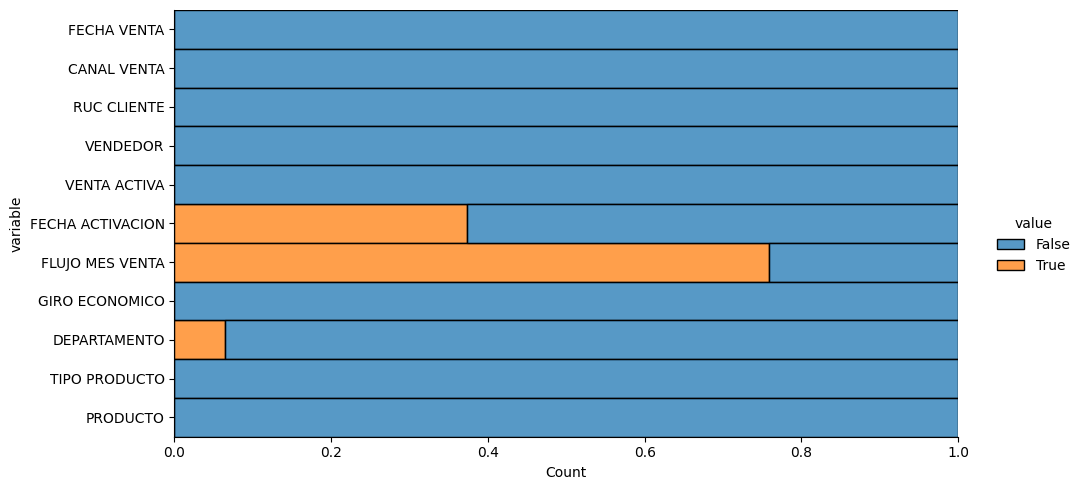

In [31]:
df = culqi_df.isnull().melt()

sns.displot(data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2)
plt.show()

In [32]:
total = culqi_df.isnull().sum().sort_values(ascending = False)
percent = (culqi_df.isnull().sum() / culqi_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
FLUJO MES VENTA,17020,0.758264
FECHA ACTIVACION,8379,0.373296
DEPARTAMENTO,1445,0.064377
FECHA VENTA,0,0.000000
CANAL VENTA,0,0.000000
RUC CLIENTE,0,0.000000
VENDEDOR,0,0.000000
VENTA ACTIVA,0,0.000000
GIRO ECONOMICO,0,0.000000
TIPO PRODUCTO,0,0.000000


### 8.¿Como podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

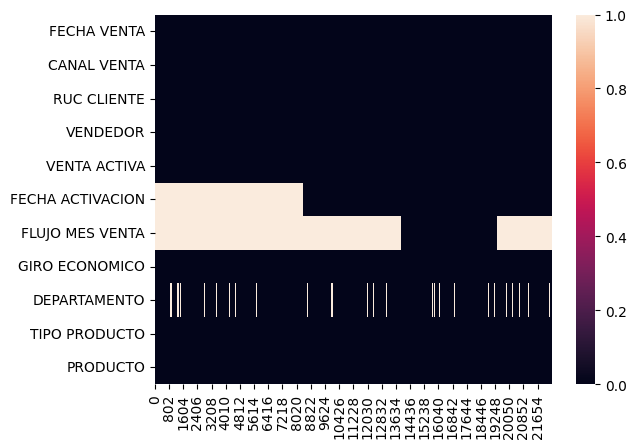

In [33]:
df = culqi_df.isnull().transpose()

sns.heatmap(data=df)

### 9.¿Cuantas observaciones perdemos si eliminamos los datos faltantes?

In [34]:
#Primero recordemos cuantos datos tenemos
culqi_df.shape

(22446, 11)

In [35]:
cdf = culqi_df.dropna()

In [36]:
cdf.shape

(5034, 11)

## Segunda Parte: Conteo y proporciones

### ¿Que estadisticos describen el conjunto de datos?

In [37]:
cdf.describe()

,VENTA ACTIVA,FLUJO MES VENTA
count,5034.0,5034.000000
mean,1.0,964.364323
std,0.0,792.355073
min,1.0,100.000000
25%,1.0,305.000000
50%,1.0,689.500000
75%,1.0,1469.750000
max,1.0,2997.000000


### Todas las Variables

In [38]:
cdf.describe(include='all')

<ipython-input-38-2fa95dc1ebb9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cdf.describe(include='all')
<ipython-input-38-2fa95dc1ebb9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cdf.describe(include='all')


,FECHA VENTA,CANAL VENTA,RUC CLIENTE,VENDEDOR,VENTA ACTIVA,FECHA ACTIVACION,FLUJO MES VENTA,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO
count,5034,5034,5034,5034,5034.0,5034,5034.000000,5034,5034,5034,5034
unique,326,4,4445,643,NaN,347,NaN,6,29,2,6
top,2022-12-29 00:00:00,DEALERS,BJFJHHCHEDG,ND,NaN,2022-12-30 00:00:00,NaN,COMERCIO,LIMA,OFFLINE,CULQI FULL
freq,66,3326,27,150,NaN,72,NaN,2027,2766,4815,3690
first,2022-01-03 00:00:00,NaN,NaN,NaN,NaN,2021-04-16 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.0,NaN,964.364323,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.0,NaN,792.355073,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.0,NaN,100.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.0,NaN,305.000000,NaN,NaN,NaN,NaN


###Solo las numericas

In [39]:
cdf.describe(include=[np.number])

,VENTA ACTIVA,FLUJO MES VENTA
count,5034.0,5034.000000
mean,1.0,964.364323
std,0.0,792.355073
min,1.0,100.000000
25%,1.0,305.000000
50%,1.0,689.500000
75%,1.0,1469.750000
max,1.0,2997.000000


###Solo Categoricas 1

In [40]:
cdf.describe(include=object)

,CANAL VENTA,RUC CLIENTE,VENDEDOR,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO
count,5034,5034,5034,5034,5034,5034,5034
unique,4,4445,643,6,29,2,6
top,DEALERS,BJFJHHCHEDG,ND,COMERCIO,LIMA,OFFLINE,CULQI FULL
freq,3326,27,150,2027,2766,4815,3690


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('CANAL VENTA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('RUC CLIENTE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('VENDEDOR').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('GIRO ECONOMICO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RUC CLIENTE'].value_counts()
    for x_label, grp in _df_4.groupby('CANAL VENTA')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CANAL VENTA')
_ = plt.ylabel('RUC CLIENTE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VENDEDOR'].value_counts()
    for x_label, grp in _df_5.groupby('RUC CLIENTE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RUC CLIENTE')
_ = plt.ylabel('VENDEDOR')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['GIRO ECONOMICO'].value_counts()
    for x_label, grp in _df_6.groupby('VENDEDOR')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VENDEDOR')
_ = plt.ylabel('GIRO ECONOMICO')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DEPARTAMENTO'].value_counts()
    for x_label, grp in _df_7.groupby('GIRO ECONOMICO')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('GIRO ECONOMICO')
_ = plt.ylabel('DEPARTAMENTO')

In [41]:
cdf.astype({
        'CANAL VENTA':'category',
        'RUC CLIENTE':'category',
        'VENDEDOR':'category',
        'GIRO ECONOMICO':'category',
        'DEPARTAMENTO':'category',
        'TIPO PRODUCTO':'category',
        'PRODUCTO':'category'
    })


,FECHA VENTA,CANAL VENTA,RUC CLIENTE,VENDEDOR,VENTA ACTIVA,FECHA ACTIVACION,FLUJO MES VENTA,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO
13920,2022-01-17,DEALERS,GJFGCACJ,OMAR BUSTAMANTE,1,2022-01-25,100.0,SERVICIO,LIMA,OFFLINE,CULQI PRO
13921,2022-02-16,DEALERS,DHAGICHD,MARCO CHANAME,1,2022-02-25,100.0,COMERCIO,LIMA,OFFLINE,CULQI PRO
13922,2022-02-17,DEALERS,GEDBJJBA,RUTH PEREYRA,1,2022-02-27,100.0,TRANSPORTE,LIMA,OFFLINE,CULQI PRO
13924,2022-03-22,BANCOS,BJFJCFHGJFA,JORGE SALAZAR,1,2022-03-29,100.0,RESTAURANTES,CALLAO,OFFLINE,CULQI PRO
13925,2022-05-06,DEALERS,AJGFBDIDHCI,ANGIE MOLINA,1,2022-05-25,100.0,OTROS,LIMA,OFFLINE,CULQI PRO
...,...,...,...,...,...,...,...,...,...,...,...
19341,2022-07-07,DEALERS,AJDGDGAHFEJ,GORETTY URUPEQUE,1,2022-07-08,2991.0,COMERCIO,LAMBAYEQUE,OFFLINE,CULQI FULL
19342,2022-08-12,DEALERS,GCDEHEAG,JOSE HERNANDEZ,1,2022-08-12,2992.0,COMERCIO,ICA,OFFLINE,CULQI FULL
19343,2022-10-12,DEALERS,DACDDIFJ,MARTIN ANTON,1,2022-10-12,2995.0,COMERCIO,LIMA,OFFLINE,CULQI FULL
19344,2022-12-29,DEALERS,DHDJDAIE,ELBA ZAPATA,1,2022-12-29,2996.0,COMERCIO,PIURA,OFFLINE,CULQI FULL


### ¿Como visualizo los conteos?

### Pandas

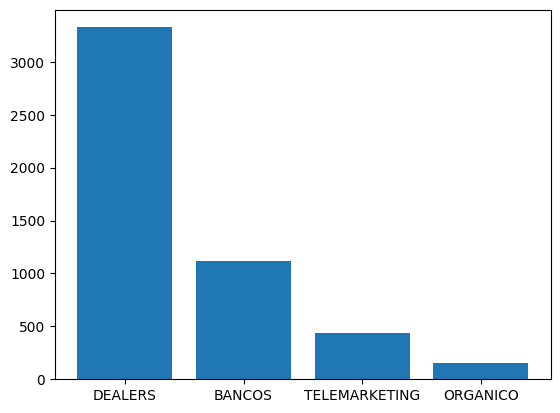

In [47]:
# import matplotlib.pyplot as plt

df = cdf['CANAL VENTA'].value_counts()

plt.bar(df.index,df.values)
plt.show()

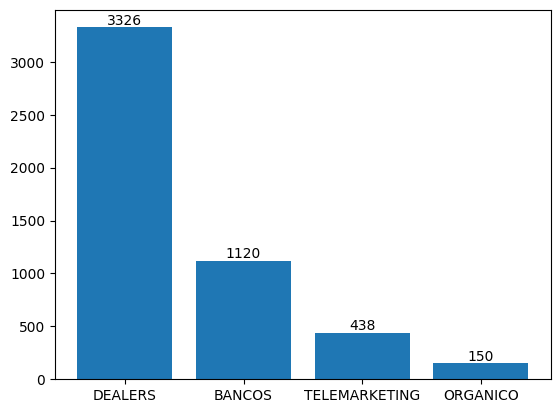

In [48]:
bars = plt.bar(df.index,df.values)

plt.bar_label(bars)
plt.show()

### Seaborn

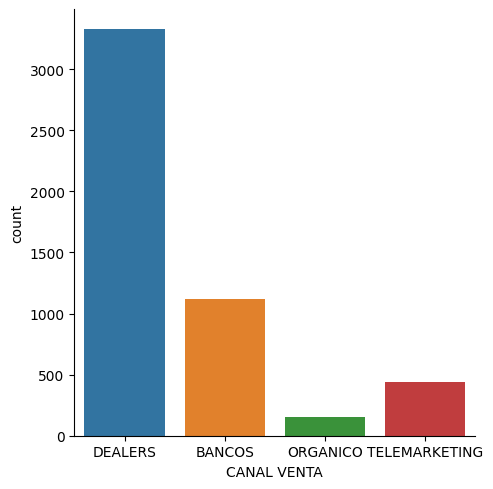

In [49]:
sns.catplot(
    data=cdf,
    x='CANAL VENTA',
    kind='count'
)
plt.show()

<Axes: xlabel='index', ylabel='count'>

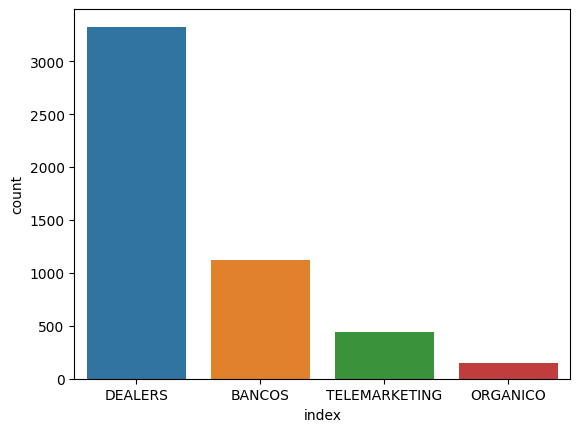

In [50]:
#realizamos una tabla para contar
df = cdf['CANAL VENTA'].value_counts(sort=True).reset_index(name='count')


sns.barplot(data=df,
            x='index',
            y='count')


### ¿Cómo visualizar las proporciones?

In [51]:
cdf['x']=''

cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 13920 to 19345
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA VENTA       5034 non-null   datetime64[ns]
 1   CANAL VENTA       5034 non-null   object        
 2   RUC CLIENTE       5034 non-null   object        
 3   VENDEDOR          5034 non-null   object        
 4   VENTA ACTIVA      5034 non-null   int64         
 5   FECHA ACTIVACION  5034 non-null   datetime64[ns]
 6   FLUJO MES VENTA   5034 non-null   float64       
 7   GIRO ECONOMICO    5034 non-null   object        
 8   DEPARTAMENTO      5034 non-null   object        
 9   TIPO PRODUCTO     5034 non-null   object        
 10  PRODUCTO          5034 non-null   object        
 11  x                 5034 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 511.3+ KB


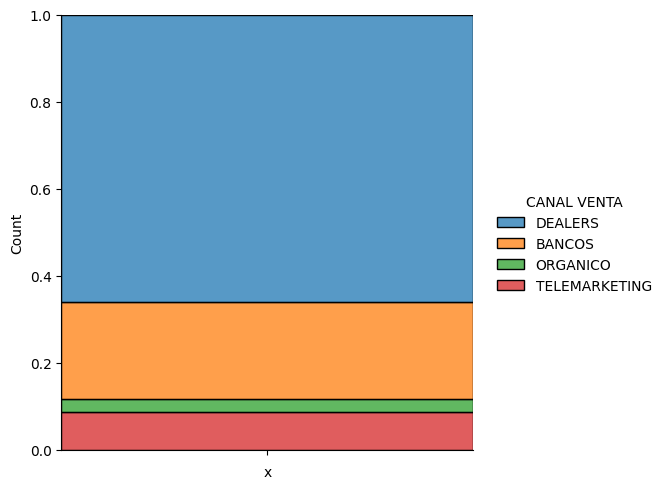

In [52]:
sns.displot(
    data=cdf,
    x='x',
    hue='CANAL VENTA',
    multiple='fill'
)

plt.show()

## Tercera Parte: Medidas de Tendencia Central

### PROMEDIO

In [53]:
cdf.mean()

<ipython-input-53-7d7ac7ede407>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  cdf.mean()
<ipython-input-53-7d7ac7ede407>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cdf.mean()


VENTA ACTIVA         1.000000
FLUJO MES VENTA    964.364323
dtype: float64

### MEDIANA

In [54]:
cdf.median()

<ipython-input-54-011358c1c002>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  cdf.median()
<ipython-input-54-011358c1c002>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cdf.median()


VENTA ACTIVA         1.0
FLUJO MES VENTA    689.5
dtype: float64

### MODE

In [55]:
cdf.mode()

,FECHA VENTA,CANAL VENTA,RUC CLIENTE,VENDEDOR,VENTA ACTIVA,FECHA ACTIVACION,FLUJO MES VENTA,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO,x
0,2022-12-29,DEALERS,BJFJHHCHEDG,ND,1,2022-12-30,100.0,COMERCIO,LIMA,OFFLINE,CULQI FULL,


In [56]:
#moda para variables categoricas:
cdf.describe(include=object)

,CANAL VENTA,RUC CLIENTE,VENDEDOR,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO,x
count,5034,5034,5034,5034,5034,5034,5034,5034
unique,4,4445,643,6,29,2,6,1
top,DEALERS,BJFJHHCHEDG,ND,COMERCIO,LIMA,OFFLINE,CULQI FULL,
freq,3326,27,150,2027,2766,4815,3690,5034


## Cuarta Parte: Medidas de Dispersión

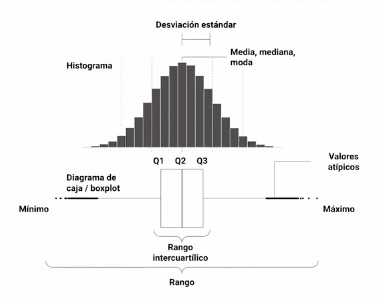

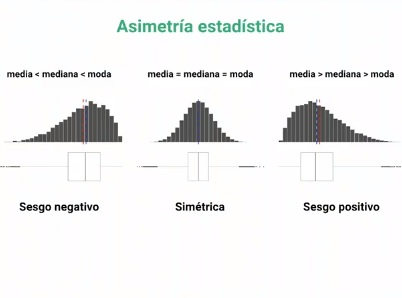

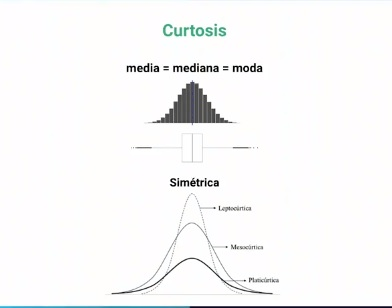

### Rango
*  La diferencia entre el valor máximo y valor mínimo

In [57]:
#Valor maximo:
cdf['FLUJO MES VENTA'].max(numeric_only=True)

2997.0

In [58]:
#Valor minimo:
cdf.min(numeric_only=True)

VENTA ACTIVA         1.0
FLUJO MES VENTA    100.0
dtype: float64

In [59]:
#Rango de variales
cdf.max(numeric_only=True) - cdf.min(numeric_only=True)

VENTA ACTIVA          0.0
FLUJO MES VENTA    2897.0
dtype: float64

### Desviación Estandar
*  La dispersión media de una variable

In [60]:
cdf.std(numeric_only=True)

VENTA ACTIVA         0.000000
FLUJO MES VENTA    792.355073
dtype: float64

### Rango intercuartílico
*  Comprenden +-25% de los datos respecto a la mediana

In [61]:
cdf.quantile(0.25,numeric_only=True)

VENTA ACTIVA         1.0
FLUJO MES VENTA    305.0
Name: 0.25, dtype: float64

In [62]:
cdf.quantile(0.50,numeric_only=True)

VENTA ACTIVA         1.0
FLUJO MES VENTA    689.5
Name: 0.5, dtype: float64

In [63]:
cdf.quantile(0.75,numeric_only=True)

VENTA ACTIVA          1.00
FLUJO MES VENTA    1469.75
Name: 0.75, dtype: float64

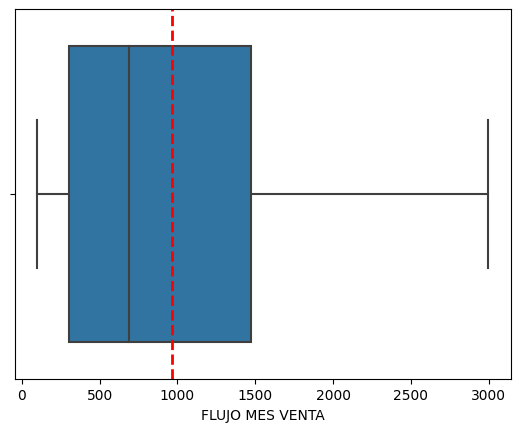

In [64]:
#BOXPLOT

sns.boxplot(
    data=cdf,
    x='FLUJO MES VENTA'
)

plt.axvline(
    x=cdf['FLUJO MES VENTA'].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.show()

### Visualizando la distribución de una variable

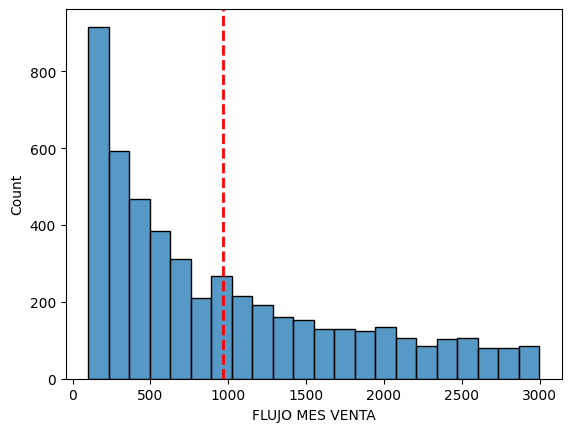

In [65]:
sns.histplot(
    data=cdf,
    x='FLUJO MES VENTA',
)

plt.axvline(
    x=cdf['FLUJO MES VENTA'].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.show()

<Axes: xlabel='FLUJO MES VENTA'>

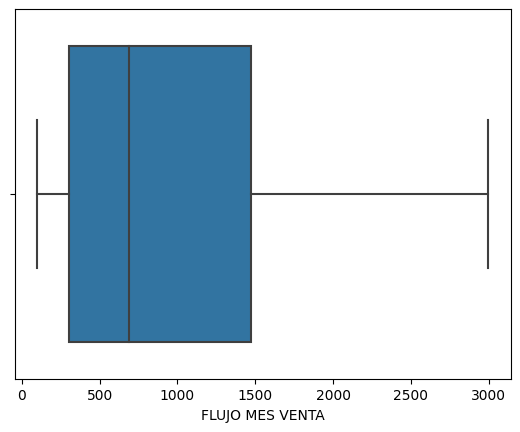

In [66]:
#BOXPLOT

sns.boxplot(
    data=cdf,
    x='FLUJO MES VENTA'
)